# CLASIFICACIÓN DE MENSAJES DE TEXTO CON NAIVE BAYES (PARTE 1)

## Conjunto de datos

El conujunto de datos se extrajo de la lista de correos de debian, de los años 2015, 2016, 2017, 2018 y 2019 de las categorías: `debian-cli debian-jobs debian-science debian-desktop debian-mentors debian-firewall debian-legal debian-edu debian-python debian-vote`.

El conjunto de datos se puede descargar en: http://misc_publico.rmgss.net/varios/MCD/tests/NaiveBayesText/debian-mailinglist-donwload-2015-2019.tar.gz

Los mensajes de la lista de correos se guardaron en el archivo `debian-mailinglist.csv` usando la herramienta https://github.com/strymsg/mailinglist-downloader-py

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('debian-mailinglist-download-2015-2019.csv', encoding='utf-8')
print(data.shape)
data.head(10)

(40019, 5)


category  year  month  \
0  debian-science  2016      1   
1  debian-science  2016     11   
2  debian-science  2016      8   
3  debian-science  2016      9   
4  debian-science  2016      4   
5  debian-science  2016     10   
6  debian-science  2016      4   
7  debian-science  2016     12   
8  debian-science  2016      1   
9  debian-science  2016      5   

                                             message format  
0  Package: wnpp\nSeverity: wishlist\nOwner: Alas...  plain  
1  Hi Andreas,\n\nthanks for helping out! Meanwhi...  plain  
2  On Sun, Aug 14, 2016 at 08:59:29PM +0200, Dani...  plain  
3  El Divendres, 9 de setembre de 2016, a les 03:...  plain  
4  Hi folks,\n\nI wonder whether somebody has dea...  plain  
5                                 \nHi Alastair,\n\n  plain  
6      \nOn 22/04/2016 11:39, Nico Schlömer wrote:\n  plain  
7  Done!\n\nRegards\n\nAnton\n\n\n2016-12-23 18:3...  plain  
8  Package: wnpp\nSeverity: wishlist\nOwner: Jose...  plain  
9  Hi,\n\nI have updated r-cran-tgp [1] to the la...  plain

## Análisis exploratorio de datos (EDA)

In [3]:
# Estadisticas generales
data.groupby('category').describe()

year                                                  \
                   count         mean       std     min      25%     50%   
category                                                                   
debian-cli          25.0  2016.320000  1.249000  2015.0  2015.00  2016.0   
debian-desktop     665.0  2016.945865  1.160372  2015.0  2016.00  2017.0   
debian-edu        5986.0  2016.853324  1.387329  2015.0  2016.00  2017.0   
debian-firewall     85.0  2016.764706  1.108915  2015.0  2016.00  2016.0   
debian-jobs        142.0  2016.514085  1.275719  2015.0  2015.25  2016.0   
debian-legal      1867.0  2016.836101  1.444924  2015.0  2016.00  2017.0   
debian-mentors   18875.0  2016.924344  1.168580  2015.0  2016.00  2017.0   
debian-python     5925.0  2016.897046  1.473786  2015.0  2015.00  2017.0   
debian-science    4589.0  2016.853999  1.326592  2015.0  2016.00  2017.0   
debian-vote       1860.0  2017.598925  1.592545  2015.0  2016.00  2019.0   

                                   month                                      \
                    75%     max    count      mean       std  min  25%   50%   
category                                                                       
debian-cli       2018.0  2019.0     25.0  8.640000  3.740321  2.0  9.0  10.0   
debian-desktop   2018.0  2019.0    665.0  6.581955  3.869440  1.0  3.0   7.0   
debian-edu       2018.0  2019.0   5986.0  6.423655  3.469972  1.0  3.0   6.0   
debian-firewall  2017.0  2019.0     85.0  5.400000  2.837672  1.0  4.0   5.0   
debian-jobs      2018.0  2019.0    142.0  5.985915  3.453821  1.0  3.0   5.0   
debian-legal     2018.0  2019.0   1867.0  6.196036  3.727613  1.0  3.0   6.0   
debian-mentors   2018.0  2019.0  18875.0  6.151205  3.476396  1.0  3.0   6.0   
debian-python    2018.0  2019.0   5925.0  6.777722  3.413102  1.0  4.0   7.0   
debian-science   2018.0  2019.0   4589.0  5.924602  3.467621  1.0  3.0   5.0   
debian-vote      2019.0  2019.0   1860.0  7.187634  3.670940  1.0  3.0   7.0   

                             
                  75%   max  
category                     
debian-cli       11.0  12.0  
debian-desktop   10.0  12.0  
debian-edu       10.0  12.0  
debian-firewall   8.0  12.0  
debian-jobs       9.0  12.0  
debian-legal     10.0  12.0  
debian-mentors    9.0  12.0  
debian-python    10.0  12.0  
debian-science    9.0  12.0  
debian-vote      11.0  12.0

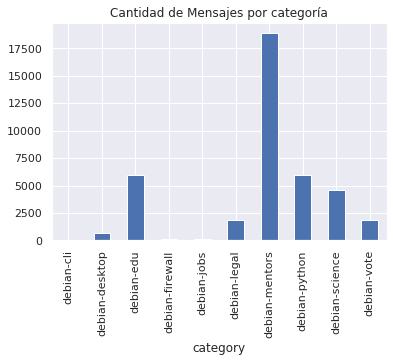

In [4]:
data.groupby('category')['category'].count().plot.bar(title='Cantidad de Mensajes por categoría', rot=90)

Text(0.5, 1.0, 'Mensajes en categorías por año')

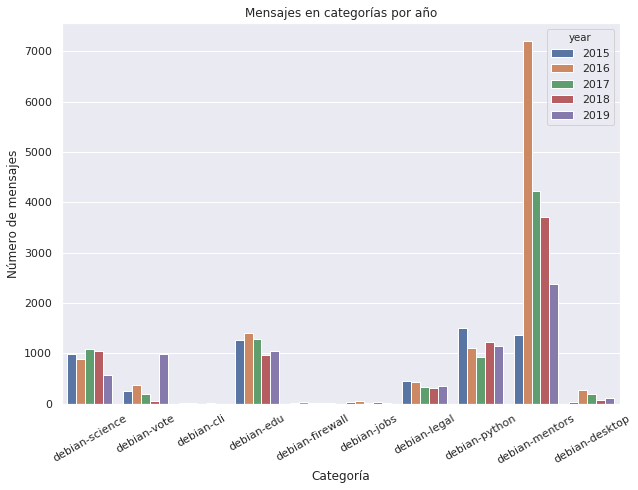

In [5]:
plt.figure(figsize=(10,7))
g = sns.countplot(x='category', hue='year', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.ylabel('Número de mensajes')
plt.xlabel('Categoría')
g.set_title("Mensajes en categorías por año")

[Text(0, 0, 'debian-science'),
 Text(0, 0, 'debian-vote'),
 Text(0, 0, 'debian-cli'),
 Text(0, 0, 'debian-edu'),
 Text(0, 0, 'debian-firewall'),
 Text(0, 0, 'debian-jobs'),
 Text(0, 0, 'debian-legal'),
 Text(0, 0, 'debian-python'),
 Text(0, 0, 'debian-mentors'),
 Text(0, 0, 'debian-desktop')]

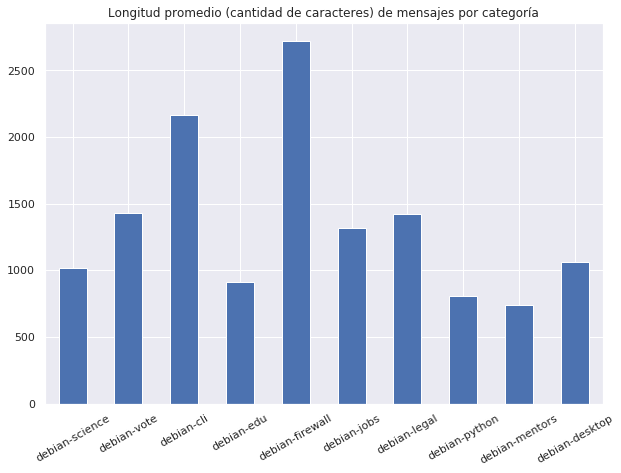

In [6]:
# Longitud promedio de mensajes por categoria
dt1 = data.copy()
dt1['message'] = data['message'].astype(str)
# print('--', dt1.dtypes)
dt1['length'] = dt1['message'].apply(len)
# dt1[dt1['category'] == 'debian-python']['length'].mean()
dict = {}
for cat in dt1['category'].unique():
    dict[cat] = int(dt1[dt1['category'] == cat]['length'].mean())
# print(dict)
ss1 = pd.Series(dict)
plt.figure(figsize=(10, 7))
g = ss1.plot(kind='bar')
g.set_title('Longitud promedio (cantidad de caracteres) de mensajes por categoría')
g.set_xticklabels(g.get_xticklabels(), rotation=30)

Text(0.5, 1.0, 'Gráifco de cajas de longitud de mensajes por categorías')

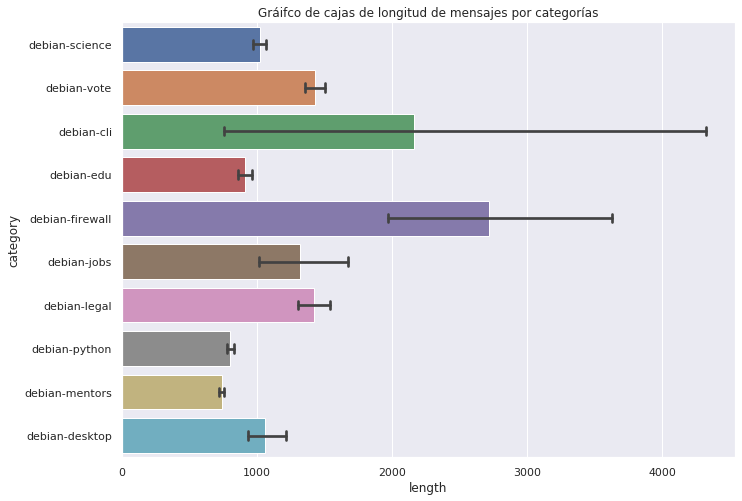

In [7]:
fig, ax = plt.subplots(figsize=(11, 8))
g = sns.barplot(x='length', y='category', data=dt1, ax=ax, capsize=.2)
g.set_title('Gráifco de cajas de longitud de mensajes por categorías')

In [8]:
# verificando datos categoricos
print('categories:', data['category'].unique())
print('years:', data['year'].unique())
print('months:', data['month'].unique())

categories: ['debian-science' 'debian-vote' 'debian-cli' 'debian-edu'
 'debian-firewall' 'debian-jobs' 'debian-legal' 'debian-python'
 'debian-mentors' 'debian-desktop']
years: [2016 2015 2018 2017 2019]
months: [ 1 11  8  9  4 10 12  5  7  2  6  3]


Por ser mensajes de correo electrónico, algunos de estos tienen en el mensaje un bloque con la firma digital, por ejemplo:
```
-----BEGIN PGP SIGNATURE-----

iQFUBAEBCAA+FiEEVZrkbC1rbTJl58uh4+M5I0i1DTkFAl3o8RwgHGlqYWNrc29u
QGNoaWFyay5ncmVlbmVuZC5vcmcudWsACgkQ4+M5I0i1DTlHdAf+JAAuZLrEmzDg
xgFlIKK7nxGabVx1j1LDbP7xnyCv2HOOI9KQfONE/zeuRu4+r2OHNC131LXDl1Om
9pS1N3bQrW5OfQQTHvU+ESM8J+H1UT6EPAZEkNkkDoKTdvlA0NB47pfWjYY5o8tB
T4LkXLcMkccPypOcNjVTN6hbzyL/Krw4CTbkJHSxD3tCRW+nLMLLDLVdAgdE9DMG
gONiU2XE4LonyVhOysWjTDTDYOKpyq0Jo3UmQsf2mrF0cNH3tQDuRpdLZJeb9W1e
hhGdsJmp912oRLyrhGLxqvfOnxWHFp/y4kwKShSAcCfEKeievz+4gLeunYMZDOf8
wHeOyLQSOg==
=l2yV
-----END PGP SIGNATURE-----
```
Este bloque es único por mensaje y no ayuda en el análisis o aporta al aplicar las técnicas de entrenamiento, por lo que se descartan estos bloques de cada mensaje.

In [9]:
# eliminando los bloques de firma digital de los mensajes
messages_cp = []
c = 0
for i in range(len(data['message'])):
    mensaje = data['message'][i]
    try:
        bi = mensaje.index('-----BEGIN PGP SIGNATURE-----')
        be = mensaje.index('-----END PGP SIGNATURE-----')
        nmensaje = mensaje[:bi] + mensaje[be + 28:]
        messages_cp.append(nmensaje)
        c +=1
        #print('procesado mensaje i:', i, len(mensaje), len(nmensaje))
    except Exception as e:
        messages_cp.append(mensaje)
        pass
data['message'] = messages_cp
print('procesados:', c)

procesados: 604


Los mensajes en la lista de correos también están en formato **html** y es necesario limpiar las etiquetas como `<div> <a> ... etc` para solo quedarse con el texto.

In [10]:
import re

def cleanHTMLTags(raw_html):
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = re.sub(cleanr, ' ', raw_html)
    return cleantext

# aplica la funcion cleanHTMLTags solo a las filas con formato html
data.loc[data['format'] == 'html', 'message'] = data.loc[data['format'] == 'html']['message'].apply(cleanHTMLTags)
# este era un mensaje en formato html
print(data['message'][10][:180])

\n      Hello,  The current configuration for packaging is available on  ppa-deb  branch of the scram repository at  https://github.com/rakhimov/scram   You can checkout it with:  


Para tener una mejor generalización se convierten todas las palabras a minúsculas por ejemplo "Hello I'm here" a "hello i'm here" aplicando una normalización similar a ([este ejemplo](https://medium.com/analytics-vidhya/randomforest-classifier-vs-multinomial-naive-bayes-for-a-multi-output-natural-language-2426381a5217))

In [11]:
data['message'] = data['message'].astype('U').str.lower()
data['message'][90][:150]

'\n\nhello all:\n\n'

También se eliminan las palabras que no aportan a la clasificación, por ejemplo palabras comunes en inglés como `a he due its more one while former has no, etc`. Este conjunto de palabras se define como **stop_words** que luego se incluye en `CountVectorizer` como parámetro para ser ignoradas.

In [12]:
from sklearn.feature_extraction import text
import string
stop_words=text.ENGLISH_STOP_WORDS
# Quitando puntuacion y stop words
def process_text(texto):
    '''
    What will be covered:
    1. Remove punctuation
    2. Remove stopwords
    3. Return text without punctuation and stop words
    '''
    #1
    nopunc = [char for char in texto if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    #2
    stop_words=text.ENGLISH_STOP_WORDS
    clean_words = [word for word in nopunc.split() if word.lower() not in stop_words]
    return ' '.join(clean_words)

data['message'] = data['message'].apply(process_text)
data['message'][:20]

0     package wnpp severity wishlist owner alastair ...
1     hi andreas thanks helping packaged ppl 12 aske...
2     sun aug 14 2016 085929pm 0200 daniel stender w...
3     el divendres 9 setembre 2016 les 033836 jose l...
4     hi folks wonder somebody dealt clapack search ...
5                                           hi alastair
6                     22042016 1139 nico schlömer wrote
7     regards anton 20161223 1834 gmt0100 ghislain v...
8     package wnpp severity wishlist owner jose luis...
9     hi updated rcrantgp 1 latest upstream version ...
10    n hello current configuration packaging availa...
11    n 20160511 912 gmt0200 ghislain vaillant ghisv...
12                             hello debianscience list
13    propose inclusion ggplot2 sciencestatistics sc...
14    hi 23122016 1119 andreas tille wrote im sure p...
15                 dear facilitate sponsorship toulbar2
16    hi mattia nonetheless wrapandsort does applied...
17    hi flann bug 822717 affects packages maint

Eliminando el texto citado de los mensajes para evitar duplicidad de palabras, todas las líneas que empiecen en `>`.

In [13]:
# data['message'].loc[20: 30]
def quitarTextoCitado(mensaje):
    nuevoMensaje = ''
    for fila in mensaje.split('\n'):
        if not fila.startswith('>'):
            nuevoMensaje += fila + '\n'
    return nuevoMensaje

data['message'] = data['message'].apply(quitarTextoCitado)
# muestra terminada
print(data['message'][40])

hi mattia updated frog package require libfolia 14 libicudev 57 erm especially bumping icu version like libfolias fix reported issue new upstream version doing way just rebuilding package picks new abi need kind edit hmmm ok thought trigger rebuild package latest abi libfolia 14 instead 13 make tips prevent abi breakage future welcome think current fix work suppose prevented libfolia proposing really fix release team just tell fix libfolia bumping soname doing transition tip tell start tracking symbols using symbol file dpkggensymbols painful upstream doing things cleneanly painful ok let try straight ive dont problem transition freeze deadline passed bump soname version libfolia upstream 500 400 im sure versioning schemeconvention dont really like high numbers compared actual software version release upstream update debian package bump libfolia4 package libfolia5 adapt libfolia5install accordingly make libfoliadev depend libfolia5 instead libfolia4 add symbols file libfolia dpkggensym

Ahora tenemos los mensajes listos para aplicar las técnicas de entrenamiento.

# Aplicación de técnicas de aprendizaje automático (PARTE 2)

## Aplicando Naive Bayes Multinomial

Vamos a probar la técnica Naive Bayes Multinomial para obtener un modelo de predicción de las categorías de mensajes. Primero se va a usar solamente el conjunto de datos de los años 2015, 2016 y 2017 para el **entrenamiento**, con esto la técnica obtendrá un diccionario de palabras y hará las predicciones con datos de esos años y vamos a **probar** la efectividad de las predicciones con los mensajes de los años 2018 y 2019.

In [14]:
# para entrenamiento
x_train = data.loc[data['year'] < 2018]['message']
y_train = data.loc[data['year'] < 2018]['category']
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)

# Si el tamaño del array es muy grande como para aplicar fit_transform directamente
# se puede dividir en 10 partes, las entrenamos por separado y luego unimos
# las predicciones generando un arreglo de predicciones del total
# x_train_subsets = np.array_split(x_train, 10)
# luego unimos con np.concatenate(x_train_subsets)
# Ejemplo: https://gis.stackexchange.com/questions/247901/memoryerror-in-supervised-random-forest-classification-in-python-sklearn

# para pruebas
x_test = data.loc[data['year'] >= 2018]['message']
y_test = data.loc[data['year'] >= 2018]['category']

print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (25978,)
y_train: (25978,)
x_test: (14041,)
y_test: (14041,)


In [116]:
def obtenerModeloMultinomialNB(x_train, y_train, x_test, y_test):
    ''' Retorna un array de predicciones y diccionario con la proporción de aciertos 
    de predicciones por categorías.
    - param x_train: conjunto de datos de mensajes para entrenamiento
    - param y_train: conjunto de datos de categorias para entrenamiento
    - param x_test: conjunto de datos de mensajes para pruebas
    - param y_test: conjunto de datos de categorias para pruebas
    
    :return (modeloNB, countVectorizer_NB, [array predicciones], {diccionario de respuestas por categorias})
    '''
    # Label Encoder se utiliza para representar en un array con valores numericos las categorias
    labelencoder_y = LabelEncoder()
    y = labelencoder_y.fit_transform(y_train)
    
    # Se usa CountVectorizer para convertir en una matriz con el conteo de palabras
    # una explicación sencilla en: https://www.quora.com/What-exactly-does-the-fit_transform-function-do-to-your-data-explanatory-variable?share=1
    cv = CountVectorizer(decode_error='ignore',
                         # ignorar palabras con ocurrencia menor a 0.4%
                         min_df=0.004)

    # El metodo fit_transform hace que se aprenda el vocabulario de palabras de todos
    # los documentos y retorna una matriz en forma de documento-termino con el conteo
    # de ocurrencias de cada palabra en el documento.
    # Es necesario este procedimiento para luego aplicar el metodo predict
    x_traincv = cv.fit_transform(x_train.astype('str'))

    x_testcv = cv.transform(x_test.astype('str'))

    # inciando la prueba NaiveBayes multinomial
    mnb = MultinomialNB()
    y_train = y.astype('int')

    labelencoder_y_test = LabelEncoder()
    y = labelencoder_y_test.fit_transform(y_test)
    
    y_test = y.astype('int')

    # formando un diccionario con las etiquetas y sus indices, servirá para cuando se hagan predicciones
    labels = pd.Series(y).unique()
    labels_encoded = pd.Series(labelencoder_y.inverse_transform(y)).unique()
    labelsEncoded = {}
    for i in range(len(labels)):
        labelsEncoded[labels[i]] = labels_encoded[i]
        
    # ajusta el clasificador Naive Bayes (entrenamiento)
    mnb.fit(x_traincv, y_train)
    
    predictions = mnb.predict(x_testcv)

    # para mostrar las etiquetas de las predicciones
    y_predicted_labels = labelencoder_y.inverse_transform(predictions)
    categories = pd.Series(y_predicted_labels).unique()
    # diccionario para mostrar aciertos y errores en las predicciones por categorias
    results_category = {}
    for cat in categories:
        results_category[cat] = [0, 0]

    a = np.array(y_test)
    count = 0
    for i in range(len(predictions)):
        if predictions[i] == a[i]: # acierto
            count += 1
            results_category[y_predicted_labels[i]][0] += 1
        else: # error al predecir
            results_category[y_predicted_labels[i]][1] += 1
    results_categories = {}
    for key, value in results_category.items():
        results_categories[key] = value[0] / (value[0] + value[1])

    print('precisión:', count/len(predictions))
    print('categories:', results_categories)
    print('\n\n', y_predicted_labels, '\n\n')
    # retornamos el modelo, las predicciones y el diccionario de resultados por categorias
    return (mnb, cv, predictions, results_categories, labelsEncoded)

In [112]:
model_multinomialNB, \
    cv_multinomialNB, \
    predictions_multinomialNB, \
    results_categoriesNB, \
    labelsEncodedNB = obtenerModeloMultinomialNB(x_train, y_train, x_test, y_test)

precisión: 0.6910476461790471
categories: {'debian-mentors': 0.8002177463255308, 'debian-science': 0.38705972434915775, 'debian-jobs': 0.2523364485981308, 'debian-legal': 0.6390977443609023, 'debian-python': 0.6581237911025145, 'debian-desktop': 0.2574626865671642, 'debian-edu': 0.900106269925611, 'debian-vote': 0.8709219858156029, 'debian-cli': 0.0, 'debian-firewall': 0.12727272727272726}


 ['debian-mentors' 'debian-science' 'debian-mentors' ... 'debian-desktop'
 'debian-desktop' 'debian-python'] 




In [27]:
# una funcion para mostrar los colores según proporción
def colorsGrafica(num):
    x = np.linspace(0, 255, 100)
    r = int(num*60)
    g = int(num*95)
    b = int(num*30)
    return '#' + format(int(x[r]), '02x') + format(int(x[g]), '02x') + format(int(x[b]), '02x')

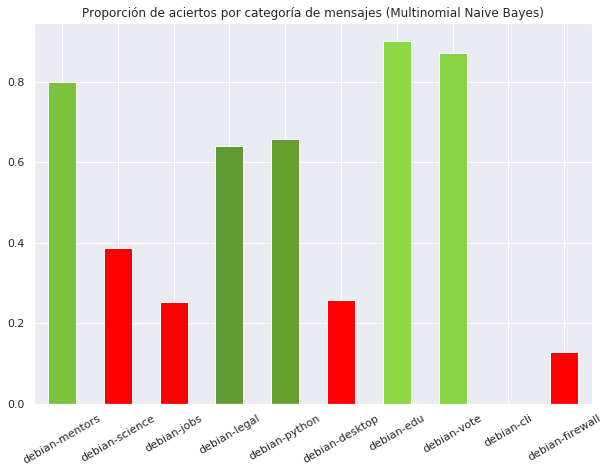

In [28]:
# Mostrando proporcion de aciertos por categorías
sns.set()
results = pd.Series(results_categoriesNB)
clrs = ['red' if (x < 0.61) else colorsGrafica(x) for x in results]
plt.figure(figsize=(10, 7))
g = results.plot.bar(color = clrs)
g.set_title('Proporción de aciertos por categoría de mensajes (Multinomial Naive Bayes)')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

Los resultados anteriores muestran que la técnica Naive Bayes logra una predicción con precisión de 0.6910476461790471 y haciendo un análisis de los aciertos de predicciones por categorías podemos observar que las categorías **debian-science debian-jobs debian-desktop debian-firewall** tienen una proporción de aciertos menor a 0.5 es decir que mas de la mitad de las predicciones son incorrectas.

Se ha usado los mensajes de correo de los años 2015, 2016 y 2017 para entrenar con la técnica Naive Bayes Multinomial y se ha probado sobre los mensajes de los años 2018 y 2019.

### Conclusiones preliminares

Al parecer se dan predicciones "malas" en categorías que en tienen menos de alrededor de 3500 mensajes para el entrenamiento como se ve en la gráfica siguiente:

Text(0.5, 1.0, 'Mensajes en categorías en años 2015, 2016 y 2017')

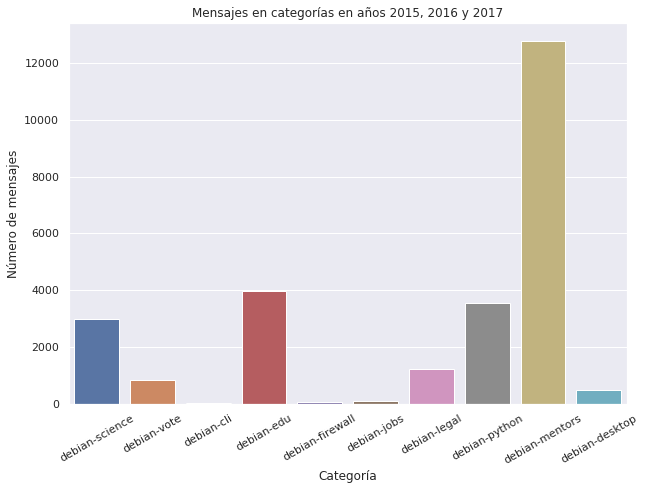

In [29]:
plt.figure(figsize=(10,7))
g = sns.countplot(x='category', data=data[data['year'] < 2018])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.ylabel('Número de mensajes')
plt.xlabel('Categoría')
g.set_title("Mensajes en categorías en años 2015, 2016 y 2017")

Sin embargo para el caso de la categoría **debian-legal** que tiene menos de 2000 mensajes y con una precisión por encima de 0.6 (mayor a 60%). La técnica Navie Bayes se basa en realizar un conteo de ocurrencias de palabras en los mensajes y calcular la probabilidad en un documento mediante probabilidad condicional y el teorema de Bayes. La categoría **debian-legal** tiene un promedio de longitud de mensajes mayor a 600 siendo la cuarta categoría con mensajes "mas largos" lo que hace que tenga más palabras.

Entonces podemos concluir que mientras más palabras se encuentren en una categoría, la predicción mejora.

## Aplicando clasificador Random Forest Tree

Se va a aplicar el clasificador Random Forest, una técnica que toma muestras al azar y genera un árbol de decisión por cada muestra. De este "bosque" de árboles generados con muestras al azar se toman los más comunes como el resultado final. [mas info](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

In [117]:
def obtenerModeloRandomForest(x_train, y_train, x_test, y_test, trees=20):
    cv = CountVectorizer(decode_error='ignore', min_df=0.004)

    x_traincv = cv.fit_transform(x_train.astype('str'))

    x_testcv = cv.transform(x_test.astype('str'))
    # Ejemplo y explicacion de Random Forest: https://www.datacamp.com/community/tutorials/random-forests-classifier-python

    labelencoder_y = LabelEncoder()
    y = labelencoder_y.fit_transform(y_train)
    y_train = y.astype('int')
    
    labelencoder_y_test = LabelEncoder()
    y = labelencoder_y_test.fit_transform(y_test)
    y_test = y.astype('int')

    # formando un diccionario con las etiquetas y sus indices, servirá para cuando se hagan predicciones
    labels = pd.Series(y).unique()
    labels_encoded = pd.Series(labelencoder_y.inverse_transform(y)).unique()
    labelsEncoded = {}
    for i in range(len(labels)):
        labelsEncoded[labels[i]] = labels_encoded[i]

    
    # creando el objeto clasificador random forest para crear un número dado de árboles
    clf = RandomForestClassifier(n_estimators=trees)
    # Al aplicar fit se crean los árboles con los datos de entrenamiento
    clf.fit(x_traincv, y_train)

    # realizando las predicciones
    randomForest_predictions = clf.predict(x_testcv)
    # print(randomForest_predictions)

    # para mostrar las etiquetas de las predicciones
    y_predicted_labels = labelencoder_y.inverse_transform(randomForest_predictions)
    categories = pd.Series(y_predicted_labels).unique()
    # diccionario para mostrar aciertos y errores en las predicciones por categorias
    results_category = {}
    for cat in categories:
        results_category[cat] = [0, 0]
        # verificando resultados
    a = np.array(y_test)
    count = 0
    for i in range(len(randomForest_predictions)):
        if randomForest_predictions[i] == a[i]: # acierto
            count += 1
            results_category[y_predicted_labels[i]][0] += 1
        else: # error al predecir
            results_category[y_predicted_labels[i]][1] += 1
    results_categories = {}
    for key, value in results_category.items():
        results_categories[key] = value[0] / (value[0] + value[1])
    print('precisión:', count/len(randomForest_predictions))
    print('categories:', results_categories)    
    return (clf, cv, randomForest_predictions, results_categories, labelsEncoded)

In [31]:
def graficarAciertosPorCategorias(dict, titulo='Proporción de aciertos por categoría de mensajes'):
    ''' Para graficar en barras los resultados de aciertos por categorias '''
    sns.set()
    results = pd.Series(dict)
    clrs = ['red' if (x < 0.61) else colorsGrafica(x) for x in results]
    plt.figure(figsize=(10, 7))
    g = results.plot.bar(color=clrs)
    g.set_title(titulo)
    g.set_xticklabels(g.get_xticklabels(), rotation=30)
    plt.show()

precisión: 0.7404743251905135
categories: {'debian-mentors': 0.7181713701953774, 'debian-python': 0.7845679012345679, 'debian-science': 0.5918744228993537, 'debian-legal': 0.6232980332829047, 'debian-desktop': 0.6822429906542056, 'debian-edu': 0.8636783733826248, 'debian-vote': 0.908256880733945, 'debian-jobs': 0.5, 'debian-firewall': 0.0, 'debian-cli': 0.0}


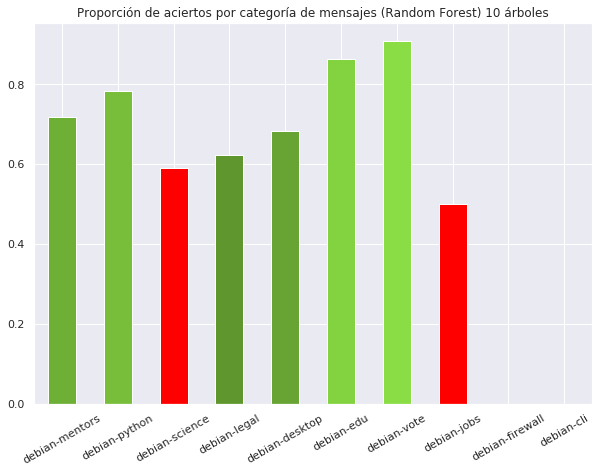

precisión: 0.7593476248130475
categories: {'debian-science': 0.6048317515099223, 'debian-mentors': 0.7287179487179487, 'debian-python': 0.8009506833036245, 'debian-legal': 0.687603305785124, 'debian-desktop': 0.8717948717948718, 'debian-edu': 0.9000480538202787, 'debian-vote': 0.9117647058823529, 'debian-jobs': 0.6666666666666666, 'debian-firewall': 0.0}


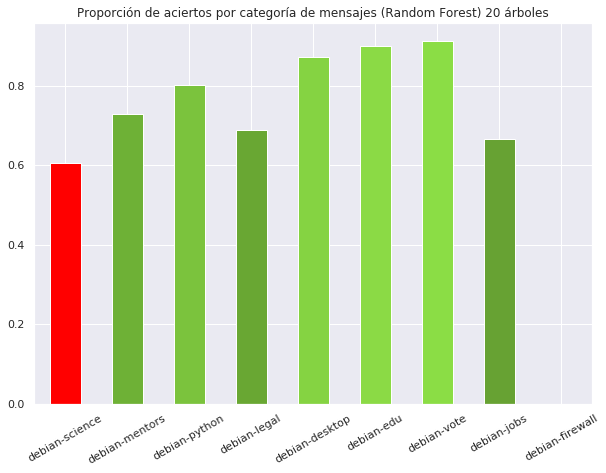

precisión: 0.7661847446763052
categories: {'debian-mentors': 0.7202902176632474, 'debian-science': 0.6764705882352942, 'debian-python': 0.8300970873786407, 'debian-legal': 0.6975206611570248, 'debian-desktop': 0.875, 'debian-edu': 0.9101941747572816, 'debian-vote': 0.9158576051779935, 'debian-jobs': 0.6428571428571429, 'debian-firewall': 0.0}


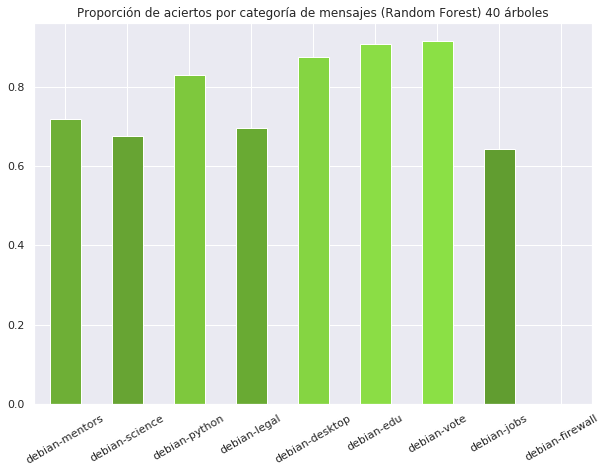

precisión: 0.7641905847161883
categories: {'debian-mentors': 0.7120651369356032, 'debian-science': 0.6814516129032258, 'debian-python': 0.8391866913123844, 'debian-legal': 0.7275922671353251, 'debian-desktop': 0.8873239436619719, 'debian-edu': 0.9143552311435523, 'debian-vote': 0.915282392026578, 'debian-jobs': 0.5652173913043478}


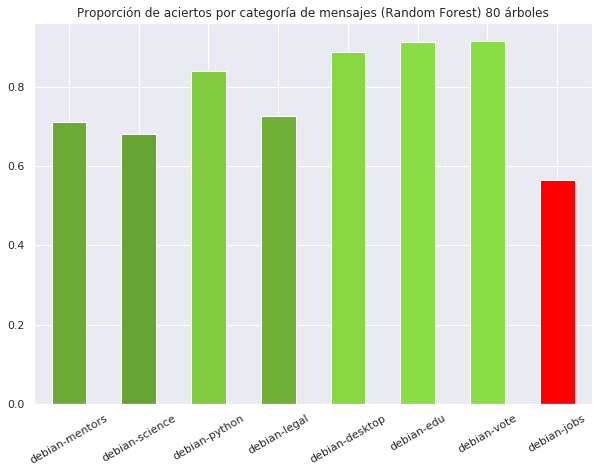

In [118]:
model_randomForest1, cv_randomForest1,\
    randomForest_predictions1, results_categories1,\
    labelsEncodedRf1 = obtenerModeloRandomForest(x_train, y_train, x_test, y_test, 10)
graficarAciertosPorCategorias(results_categories1,
                              'Proporción de aciertos por categoría de mensajes (Random Forest) 10 árboles')

model_randomForest2, cv_randomForest2,\
    randomForest_predictions2, results_categories2,\
    lablesEncodedRf2 = obtenerModeloRandomForest(x_train, y_train, x_test, y_test, 20)
graficarAciertosPorCategorias(results_categories2,
                              'Proporción de aciertos por categoría de mensajes (Random Forest) 20 árboles')

model_randomForest3, cv_randomForest3,\
    randomForest_predictions3, results_categories3,\
    labelsEncodedRf3 = obtenerModeloRandomForest(x_train, y_train, x_test, y_test, 40)
graficarAciertosPorCategorias(results_categories3,
                              'Proporción de aciertos por categoría de mensajes (Random Forest) 40 árboles')

model_randomForest4, cv_randomForest4, \
    randomForest_predictions4, results_categories4,\
    labelsEncodedRf4 = obtenerModeloRandomForest(x_train, y_train, x_test, y_test, 80)
graficarAciertosPorCategorias(results_categories4,
                              'Proporción de aciertos por categoría de mensajes (Random Forest) 80 árboles')

### Conclusiones preliminares

La técnica del clasificador "Random Forest" según la cantidad de clasificaciones aleatorias (más cantidad de árboles) donde creando 80 árboles de decisión ninguna de las categorías salvo **debian-firewall** tienen al menos 60% de precisión. La categoría debian-firewall siempre da predicciones equivocadas y esto puede ser por la poca cantidad de mensajes y por el contenido mismo de los mensajes.

Haciendo una comparación entre las técnicas *Multinomial Naive Bayes* y el clasificador *Random Forest* para los correos de debian, podemos ver:

- La técnica *Random Forest* con al menos 10 árboles, supera a *Multinomial Naive Bayes*.
- El éxito del *Random Forest* depende de la cantidad de mensajes que se usan para el entrenamiento.
- La técnica *Random Forest* en general requiere mucho más tiempo para hacer el entranamiento que la técnica *Naive Bayes*.
- Las categorías **debian-edu debian-mentors debian-vote** tienen buenas predicciones usando *Naive Bayes* y el entrenamiento es mucho más rápido que con *Random Forest*
- Es necesario hacer un mejor análisis del contenido de los mensajes en categorías como **debian-jobs debian-firewall y debian-science** para mejorar sus resultados, puede que las dos técnicas usadas no sean adecuadas en estos casos.

In [ ]:
# Gurdando los resultados en archivos para que otro programa o script los utilice


La **parte 3 aplicación de modelos obtenidos** se puede revisar en el notebook `debian-2015-2019-model-application.ipynb`. A continuación se guardan los modelos obtenidos y otros resultados a usar.

In [119]:
# Guardando el modelo en archivos para que otros programas lo puedan usar
import pickle
pickle.dump(model_multinomialNB, open('./model_multinomialNB.pkl', "wb"))
pickle.dump(cv_multinomialNB, open('./cv_multinomialNB.pkl', "wb"))
pickle.dump(labelsEncodedNB, open('./lablesEncodedNB.pkl', "wb"))

pickle.dump(model_randomForest4, open('./model_randomForest.pkl', "wb"))
pickle.dump(cv_randomForest4, open('./cv_randomForest.pkl', "wb"))
pickle.dump(labelsEncodedRf4, open('./lablesEncodedRf.pkl', "wb"))

In [123]:
# Pruebas
arr = ["- La técnica *Random Forest* con al menos 10 árboles, supera a *Multinomial Naive Bayes*.- El éxito del *Random Forest* depende de la cantidad de mensajes que se usan para el entrenamiento.",'python pip pip install karseten tuna deps coul indeed umask well bash pre break continue while', "python pip", 'E: pybuild pybuild:336: test: plugin distutils failed with: exit code=1: cd /build/snakemake-4.8.0/.pybuild/cpython3_3.6_snakemake/build; python3.6 -m nose tests dh_auto_test: pybuild --test --test-nose -i python{version} -p 3.6 returned exit code 13 make: *** [debian/rules:17: build] Error 25 dpkg-buildpackage: error: debian/rules build subprocess returned exit status 2 I: copying local configuration E: Failed autobuilding of package I: user script /var/cache/pbuilder/build/cow.11501/tmp/hooks/C99_failed_build starting root:/# echo $PATH', "I have reported the issue upstream but no response so far.  While the error message contains some hint how to solve the issue I would like to backup this by some competent advise.", "Traceback (most recent call last): File ""/tmp/autopkgtest-lxc.5a99fnj6/downtmp/autopkgtest_tmp/tests/test_core/test_sequence.py"", line 660, in test_consistent_gap_degen_handling self.assertEqual(dna.stripBadAndGaps(), raw_ungapped) File ""/usr/lib/python2.7/dist-packages/cogent/core/sequence.py"", line 1251, in stripBadAndGaps valid_indices -= self._data == i TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.", "It is not fine. But I've chosen to not go down the road that would be needed here. I've got enough on my plate, I can't put this on. If someone does go down the road, then any project creation on salsa would possibly end up needing to be vetted by an admin (or a new team doing this, or a combination of new team and NEW handling, as parts of this surely could be merged then). Right now, the handling of stuff on salsa follows what was done for alioth ""It may have a .debian.org, but its not run by Debian, so the project chose to ignore parts of the problems with it"". And implicitly either put it onto the shoulders of the alioth admins, or the individual.", "I am the maintainer of the ""python-astropy"" package, that currently", "Then it seems you have no more need for us to evaluate your custom license text. If you have no interest in contributors to your work, you have no interest in the conditions for that contribution.", " desktop-base (10.0.0) unstable; urgency=medium . * Add Buster’s default theme futurePrototype by Alex Makas.  * Add alternate Buster theme moonlight by Juliette Taka Belin. * Add vendor (here Debian) logos and icons and the associated alternatives so that derivates can easily replace with their own. (Closes: #898456)* Optimize PNGs to reduce installed size. * Migrate d/copyright to machine-readable format 1.0. * Bump Standards-Version to 4.3.0 (no change required).", "On Thu, Dec 06, 2018 at 04:14:50AM +0000, Mo Zhou wrote:", "I'd take option 2.There ought to be no packages using python-dput (like, srly…), and I see no real reason for anybody to keep using the py2 version after the switch.", "python", "Actually, the GPL only mandates stating *who* made changes and *when*,but not *what* changed. As I see, just adding something like ""Modified by John Doe on 2019.07.25"" on the comment header where the GPL copyright notice lies would suffice.", "cassandra smarthponhe, tukessi", "Again, maybe a lawyer might correct me on this.But I think that the GPL says that you have to distribute any derived work as GPL. It doesn't say that you have to distribute the derived work as GPL only. Violating the GPL terms would terminate the license itself, but in theory, if the copyright owner gave you a different license too and you have a compatible codebase that is legally sound (unlikely, as it should NOT use ANY GPL covered code your code depends upon, not even the headers, but maybe possible if it provides completely different interfaces), nothing prevent you to use such different license to adapt and merge the derivative work to it.It goes without saying you would lose any grant on the code covered by GPL.But, to my knowledge, the resulting work would still be legally distributable.Giacomo", "Congratulations! By popular vote and consensus of the desktop team, your desktop artwork concept futurePrototype has made the cut for the final artwork for Debian 10 (Buster).We thought we'd give you a heads-up, since we plan to announce this publicly on Monday.", "some leal terms", "and subject line Bug#898456: fixed in desktop-<<<<<", "We are looking for a GNU/Linux System Administrator in Charlotte, North Carolina. Other locations near the EST timezone will"]
tstMjs = pd.Series(arr)
# print(tstMjs)
vect = cv_multinomialNB.transform(tstMjs).toarray()
# print(cv_multinomialNB.vocabulary_)
my_prediction = model_multinomialNB.predict(vect)
# print(results_categoriesNB, list(results_categoriesNB.keys()))
for i in range(len(my_prediction)):
    #print(my_prediction[i],'-00->', list(results_categoriesNB.keys())[my_prediction[i]])
    print(my_prediction[i], '-->', labelsEncodedNB[my_prediction[i]])
    #print(my_prediction[i], '-->', list(results_categories.keys())[my_prediction[i]])
    #print(my_prediction[i], '-->', inverse_vocabulary[i])
#print('Prediccion:::\n', my_prediction)
#print('predict_proba:', model_multinomialNB.predict_proba(vect))

8 --> debian-science
7 --> debian-python
7 --> debian-python
7 --> debian-python
6 --> debian-mentors
7 --> debian-python
7 --> debian-python
7 --> debian-python
5 --> debian-legal
1 --> debian-desktop
2 --> debian-edu
7 --> debian-python
7 --> debian-python
5 --> debian-legal
6 --> debian-mentors
5 --> debian-legal
1 --> debian-desktop
5 --> debian-legal
2 --> debian-edu
6 --> debian-mentors


In [134]:
# para random forest
# print(cv_randomForest1.get_)
vect = cv_randomForest1.transform(tstMjs).toarray()
my_prediction = model_randomForest1.predict(vect)
# print(results_categories1)
for i in range(len(my_prediction)):
    if i in labelsEncodedRf1:
        print(my_prediction[i], '-->', labelsEncodedRf1[i])
    else:
        print('No hay prediccion', my_prediction[i])

# 2
# vect = cv_randomForest2.transform(tstMjs).toarray()
# my_prediction = model_randomForest2.predict(vect)
# for i in range(len(my_prediction)):
#     print(my_prediction[i], '-->', list(results_categories2.keys())[my_prediction[i]])
# n# 3
# vect = cv_randomForest3.transform(tstMjs).toarray()
# my_prediction = model_randomForest3.predict(vect)
# for i in range(len(my_prediction)):
#     print(my_prediction[i], '-->', list(results_categories3.keys())[my_prediction[i]])

# 4
vect = cv_randomForest4.transform(tstMjs).toarray()
my_prediction = model_randomForest4.predict(vect)
print('RF4')
for i in range(len(my_prediction)):
    if i in labelsEncodedRf4:
        print(my_prediction[i], '-->', labelsEncodedRf4[my_prediction[i]])
    else:
        print('No hay prediccion', my_prediction[i])

5 --> debian-cli
7 --> debian-desktop
7 --> debian-edu
7 --> debian-firewall
6 --> debian-jobs
6 --> debian-legal
2 --> debian-mentors
7 --> debian-python
5 --> debian-science
1 --> debian-vote
No hay prediccion 7
No hay prediccion 7
No hay prediccion 7
No hay prediccion 5
No hay prediccion 6
No hay prediccion 5
No hay prediccion 1
No hay prediccion 6
No hay prediccion 6
No hay prediccion 6
RF4
2 --> debian-edu
7 --> debian-python
7 --> debian-python
7 --> debian-python
6 --> debian-mentors
6 --> debian-mentors
6 --> debian-mentors
7 --> debian-python
5 --> debian-legal
6 --> debian-mentors
No hay prediccion 6
No hay prediccion 7
No hay prediccion 7
No hay prediccion 5
No hay prediccion 6
No hay prediccion 5
No hay prediccion 9
No hay prediccion 6
No hay prediccion 6
No hay prediccion 6
